In [183]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras

from sklearn.metrics import confusion_matrix, classification_report

In [184]:
import numpy as np

class SingleLayerPerceptronSigmoid:
    def __init__(self, input_size, learning_rate, epochs):
        np.random.seed(42)
        self.weights = np.random.uniform(-0.3, 0.3, size=input_size + 1)
        self.learning_rate = learning_rate
        self.epochs = epochs

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _sigmoid_derivative(self, x):
        return self._sigmoid(x) * (1 - self._sigmoid(x))

    def _add_bias(self, X):
        return np.c_[np.ones((X.shape[0], 1)), X]

    def _predict(self, inputs):
        summation = np.dot(inputs, self.weights)
        return self._sigmoid(summation)

    def train(self, X_train, y_train):
        X_train_biased = self._add_bias(X_train)

        for epoch in range(self.epochs):
            for inputs, label in zip(X_train_biased, y_train):
                prediction = self._predict(inputs)

                # Update weights
                error = label - prediction
                adjustment = -2 * error * self._sigmoid_derivative(prediction)

                self.weights -= self.learning_rate * adjustment * inputs

            # Print training accuracy at each epoch (optional)
            if epoch % 10 == 0:
                training_accuracy = self.evaluate(X_train, y_train)
                print(f"Epoch {epoch}/{self.epochs}: Training Accuracy = {training_accuracy:.2f}%")

    def predict(self, X_test):
        X_test_biased = self._add_bias(X_test)
        predictions = np.round(self._predict(X_test_biased)).astype(np.int32)
        return predictions

    def evaluate(self, X, y):
        predictions = self.predict(X)
        accuracy = np.mean(predictions == y)
        return accuracy * 100

    def get_weights(self):
        return self.weights


In [185]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

class Perceptron(object):
    def __init__(self, X_dim, activation='sigmoid'):
        if activation == 'sigmoid':
            self.activation = sigmoid
            self.activation_deriv = sigmoid_derivative
        else:
            raise ValueError('Unknown activation function %s' % activation)
            
        nweights = X_dim + 1
        self.W = (2 * np.random.random(nweights) - 1) * 0.25
        self.W = self.W.reshape(-1, 1)
        self.train_errors = []
        self.testing_errors = []
    
    def _add_bias_X(self, X):
        """Returns X with an additional entry set to 1, representing bias"""
        temp = np.ones([X.shape[0], X.shape[1]+1])
        temp[:, :-1] = X
        return temp
    
    def _error_derivative(self, y_true, y_pred, y_pred_prime):
        return -2 * (y_true - y_pred) * y_pred_prime  # -2 dapet dari mana
    
    def _error(self, y_true, y_pred):
        return (y_true - y_pred)**2
        
    def train(self, X_train, y_train, X_validation, y_validation,
              learning_rate=0.01, epochs=10, minibatch_size=10, weight_decay=0):
        assert len(X_train.shape) == 2, "X must be 2D"
        X_train = self._add_bias_X(X_train)
        X_validation = self._add_bias_X(X_validation)
        
        self.weight_decay = weight_decay
        
        for epoch in range(epochs):
            minibatch_indices = np.arange(X_train.shape[0])
            np.random.shuffle(minibatch_indices)
            # for each minibatch, compute gradient of weights
            for start in range(0, len(minibatch_indices), minibatch_size):
                end = start + minibatch_size
                indices = minibatch_indices[start:end]
                Xb = X_train[indices]
                yb = y_train[indices]
                
                l = Xb.dot(self.W).flatten()
                deltas = self._error_derivative(yb, self.activation(l), self.activation_deriv(l))
                grad_W = Xb.T.dot(deltas).reshape(-1, 1) / minibatch_size
                self.W -= learning_rate * grad_W + self.weight_decay * self.W
            
            # evaluate train/validation errors
            self.train_errors.append(
                self._error(y_train, self.decision_function(X_train, addbias=False)).mean()
            )
            self.testing_errors.append(
                self._error(y_validation, self.decision_function(X_validation, addbias=False)).mean()
            )
        
        return self
                    
    def predict(self, X, addbias=True):
        return (self.decision_function(X, addbias) > 0.5).astype(np.int64)

    def decision_function(self, X, addbias=True):
        """
        - if addbias is True, an entry with 1 will be added to X to represent the bias.
        """
        "sigmoid 0 sampai 1, 0.8219"
        if addbias:
            X = self._add_bias_X(X)
        return self.activation(X.dot(self.W).flatten())

In [186]:
def plot_cm(matrix, title): 
    ax = plt.subplot()
    sns.heatmap(matrix, annot=True, fmt='g', ax=ax, cmap=sns.cubehelix_palette(as_cmap=True))

    ax.set_title(f'Confusion Matrix {title}', pad=10);
    ax.xaxis.set_ticklabels(['Not Survived', 'Survived']);ax.yaxis.set_ticklabels(['Not Survived', 'Survived'])
    plt.show()

In [187]:
lr = 0.01
epochs = 1000

In [188]:
train_normalize = pd.read_csv('D:\Code\py_code\Artificial-Neural-Network\Single-Layer-Perceptron\data/train_data_normalized.csv', sep=';')
x_train_normalize = train_normalize.iloc[:, 1:-1].values
y_train_normalize = train_normalize.iloc[:, -1].values

test_normalize = pd.read_csv('D:\Code\py_code\Artificial-Neural-Network\Single-Layer-Perceptron\data/test_data_normalized.csv', sep=';')
x_test_normalize = test_normalize.iloc[:, 1:-1].values
y_test_normalize = test_normalize.iloc[:, -1].values

In [189]:
input_size = x_train_normalize.shape[1]
p = SingleLayerPerceptronSigmoid(input_size, learning_rate=lr, epochs=epochs)
p.train(x_train_normalize, y_train_normalize)
predict = p.predict(x_test_normalize)

Epoch 0/1000: Training Accuracy = 59.55%
Epoch 10/1000: Training Accuracy = 77.95%
Epoch 20/1000: Training Accuracy = 77.95%
Epoch 30/1000: Training Accuracy = 78.23%
Epoch 40/1000: Training Accuracy = 77.95%
Epoch 50/1000: Training Accuracy = 77.67%
Epoch 60/1000: Training Accuracy = 78.37%
Epoch 70/1000: Training Accuracy = 78.93%
Epoch 80/1000: Training Accuracy = 79.07%
Epoch 90/1000: Training Accuracy = 79.07%
Epoch 100/1000: Training Accuracy = 79.07%
Epoch 110/1000: Training Accuracy = 79.21%
Epoch 120/1000: Training Accuracy = 79.21%
Epoch 130/1000: Training Accuracy = 79.07%
Epoch 140/1000: Training Accuracy = 79.07%
Epoch 150/1000: Training Accuracy = 78.93%
Epoch 160/1000: Training Accuracy = 79.21%
Epoch 170/1000: Training Accuracy = 79.49%
Epoch 180/1000: Training Accuracy = 79.49%
Epoch 190/1000: Training Accuracy = 79.92%
Epoch 200/1000: Training Accuracy = 79.92%
Epoch 210/1000: Training Accuracy = 79.78%
Epoch 220/1000: Training Accuracy = 79.78%
Epoch 230/1000: Traini

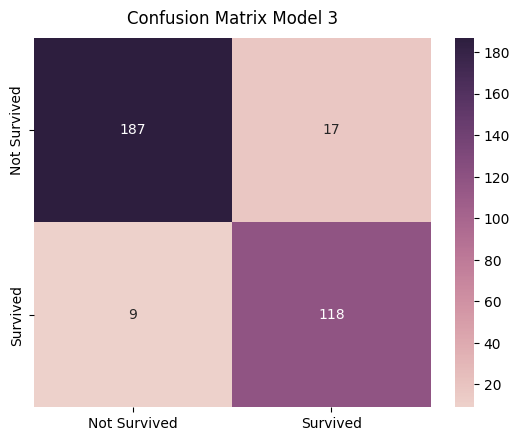

In [190]:
model3_cf = confusion_matrix(y_test_normalize, predict)
plot_cm(model3_cf, 'Model 3')

In [191]:
model3_report = classification_report(y_test_normalize, predict, output_dict=True, target_names=['Not Survived',"Survived"])
pd.DataFrame(model3_report).transpose()

,precision,recall,f1-score,support
Not Survived,0.954082,0.916667,0.935000,204.00000
Survived,0.874074,0.929134,0.900763,127.00000
accuracy,0.921450,0.921450,0.921450,0.92145
macro avg,0.914078,0.922900,0.917882,331.00000
weighted avg,0.923384,0.921450,0.921864,331.00000


In [192]:
perceptron = Perceptron(x_train_normalize.shape[1]).train(x_train_normalize, y_train_normalize, x_test_normalize, y_test_normalize,
                                          epochs=1000, minibatch_size=10)
predict = perceptron.predict(x_test_normalize)
model3_report = classification_report(y_test_normalize, predict, output_dict=True, target_names=['Not Survived',"Survived"])
pd.DataFrame(model3_report).transpose()

,precision,recall,f1-score,support
Not Survived,0.970297,0.960784,0.965517,204.000000
Survived,0.937984,0.952756,0.945312,127.000000
accuracy,0.957704,0.957704,0.957704,0.957704
macro avg,0.954141,0.956770,0.955415,331.000000
weighted avg,0.957899,0.957704,0.957765,331.000000


In [193]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
df_v2 = pd.read_csv(r"D:\Code\py_code\Artificial-Neural-Network\Single-Layer-Perceptron\data\train_data_cl_v2.csv")
df_v2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [194]:
del df_v2['Name']
del df_v2['Ticket']
del df_v2['Cabin']

missing = pd.DataFrame({
    'total' : df_v2.isnull().sum(),
    'percent' : df_v2.isnull().sum()/df_v2.shape[0] * 100})

lbenc = LabelEncoder()

for i in df_v2.columns.values:
    if df_v2[i].dtypes == 'object':
        df_v2[i] = lbenc.fit_transform(df_v2[i])

df_v2.head()

train_v2 = df_v2.copy()
x_train_v2 = train_v2.iloc[:, 2:].values
y_train_v2 = df_v2.iloc[:, 1].values
train_v2

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
707,886,0,3,0,39.0,0,5,29.1250,1
708,887,0,2,1,27.0,0,0,13.0000,2
709,888,1,1,0,19.0,0,0,30.0000,2
710,890,1,1,1,26.0,0,0,30.0000,0


In [195]:
feature_v2 = x_train_v2.copy()
label_v2 = y_train_v2.copy()
label_v2 = label_v2.reshape(-1,1)
passengerId_v2 = train_v2.iloc[:, 0].values.reshape(-1,1)
col_v2 = train_v2.columns.values.tolist()
col_v2.pop(1)
col_v2.append("Survived")

mnmx_v2 = MinMaxScaler()
feature_v2 = mnmx_v2.fit_transform(feature_v2)

data_v2 = np.concatenate((passengerId_v2, feature_v2), axis=1)
dataLabel_v2 = np.concatenate((data_v2, label_v2), axis=1)
normalize_data_train_v2 = pd.DataFrame(dataLabel_v2, columns=col_v2)

normalize_data_train_v2.drop('PassengerId', axis=1, inplace=True)
normalize_data_train_v2 = normalize_data_train_v2.astype({"Survived": "int64"})

X_train_normalized_v2 = normalize_data_train_v2.iloc[:, :-1].values
y_train_normalized_v2 = normalize_data_train_v2.iloc[:, -1].values 

normalize_data_train_v2

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,1.0,0.271174,0.2,0.000000,0.014151,1.0,0
1,0.0,0.0,0.472229,0.2,0.000000,0.139136,0.0,1
2,1.0,0.0,0.321438,0.0,0.000000,0.015469,1.0,1
3,0.0,0.0,0.434531,0.2,0.000000,0.103644,1.0,1
4,1.0,1.0,0.434531,0.0,0.000000,0.015713,1.0,0
...,...,...,...,...,...,...,...,...
707,1.0,0.0,0.484795,0.0,0.833333,0.056848,0.5,0
708,0.5,1.0,0.334004,0.0,0.000000,0.025374,1.0,0
709,0.0,0.0,0.233476,0.0,0.000000,0.058556,1.0,1
710,0.0,1.0,0.321438,0.0,0.000000,0.058556,0.0,1


In [196]:
dt_v2 = pd.read_csv(r"D:\Code\py_code\Artificial-Neural-Network\Single-Layer-Perceptron\data\test_data_cl_v2.csv")

gdt_v2 = pd.read_csv(
    r"D:\Code\py_code\Artificial-Neural-Network\Single-Layer-Perceptron\data\test_data_GroundTruth_cl.csv"
)
dt_v2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [197]:
del dt_v2['Name']
del dt_v2['Ticket']
del dt_v2['Cabin']

missing_v2 = pd.DataFrame({
    'total' : dt_v2.isnull().sum(),
    'percent' : dt_v2.isnull().sum()/dt_v2.shape[0] * 100})

lbenc_v2 = LabelEncoder()

for col_v2 in dt_v2.columns.values:
    if dt_v2[col_v2].dtype == "object":
        dt_v2[col_v2] = lbenc_v2.fit_transform(dt_v2[col_v2])
        
dt_v2.head()

merged_test_data_v2 = pd.merge(dt_v2, gdt_v2, on="PassengerId")
merged_test_data_v2

test_v2 = merged_test_data_v2.copy()

X_test_v2 = test_v2.iloc[:, 1:8]
y_test_v2 = test_v2.iloc[:, 8]

In [198]:
feature_v2 = X_test_v2.copy()
label_v2 = y_test_v2.copy().values.reshape(-1, 1)
passengerId_v2 = test_v2.iloc[:, 0].values.reshape(-1, 1)

col_v2 = test_v2.columns.values.tolist()
col_v2.pop(8) 

mnmx_v2 = MinMaxScaler()
feature_v2 = mnmx_v2.fit_transform(feature_v2)

data_v2 = np.concatenate((passengerId_v2, feature_v2), axis=1)
normalize_data_test_v2 = pd.DataFrame(data_v2, columns=col_v2)

normalize_data_test_v2['Survived'] = y_test_v2.values

normalize_data_test_v2.drop('PassengerId', axis=1, inplace=True)
normalize_data_test_v2 = normalize_data_test_v2.astype({"Survived": "int64"})

X_test_normalized_v2 = normalize_data_test_v2.iloc[:, :-1].values
y_test_normalized_v2 = normalize_data_test_v2.iloc[:, -1].values 

normalize_data_test_v2

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,1.0,0.452723,0.000,0.000000,0.015282,0.5,0
1,1.0,0.0,0.617566,0.125,0.000000,0.013663,1.0,1
2,0.5,1.0,0.815377,0.000,0.000000,0.018909,0.5,0
3,1.0,1.0,0.353818,0.000,0.000000,0.016908,1.0,0
4,1.0,0.0,0.287881,0.125,0.166667,0.023984,1.0,1
...,...,...,...,...,...,...,...,...
326,1.0,0.0,0.037320,0.125,0.166667,0.026887,1.0,1
327,0.0,0.0,0.485692,0.125,0.000000,0.175668,0.5,1
328,1.0,0.0,0.367005,0.000,0.000000,0.015176,1.0,1
329,0.0,0.0,0.512066,0.000,0.000000,0.212559,0.0,1


In [199]:
class SingleLayerPerceptron:
    def __init__(self, input_size, learning_rate, epochs):
        np.random.seed(42)
        self.weights = np.random.rand(input_size + 1) * 0.01
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.training_accuracy = []
        self.testing_accuracy = []

    def _activation_function(self, x):
        return 1 if x >= 0 else 0

    def _predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self._activation_function(summation)

    def _calculate_accuracy(self, X, y):
        predictions = self.predict(X)
        accuracy = np.mean(predictions == y)
        return accuracy * 100

    def train(self, X_train, y_train, x_test, y_test):
        for epoch in range(self.epochs):
            for inputs, label in zip(X_train, y_train):
                prediction = self._predict(inputs)

                # Update weights
                error = label - prediction
                self.weights[1:] += self.learning_rate * error * inputs
                self.weights[0] += self.learning_rate * error

            # Calculate training accuracy at each epoch
            self.training_accuracy.append(self._calculate_accuracy(X_train, y_train))
            self.testing_accuracy.append(self._calculate_accuracy(x_test, y_test))

    def predict(self, X_test):
        predictions = [self._predict(inputs) for inputs in X_test]
        return np.array(predictions)
    
    def get_weights(self):
        return self.weights
    
    def get_accuracy(self):
        return [self.training_accuracy, self.testing_accuracy]

In [204]:
epoch = 1000
lr = 0.01
random_seed = 42

input_size = x_train_v2.shape[1]
perceptron = SingleLayerPerceptron(input_size, lr, epoch)
perceptron.train(x_train_v2, y_train_v2, X_test_normalized_v2, y_test_v2)
p1 = perceptron.predict(X_test_normalized_v2)

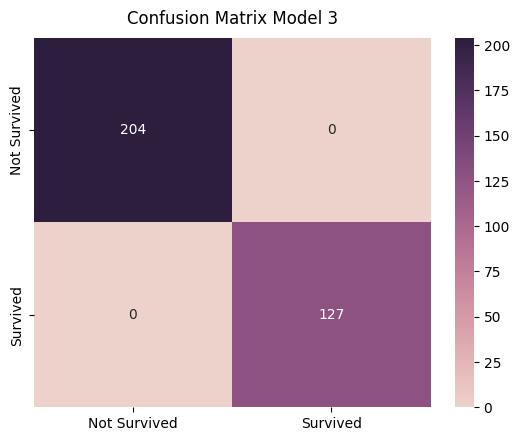

In [201]:
model3_cf1 = confusion_matrix(y_test_v2, p1)
plot_cm(model3_cf1, 'Model 3')

In [202]:
model3_report1 = classification_report(y_test_v2, p1, output_dict=True, target_names=['Not Survived',"Survived"])
pd.DataFrame(model3_report1).transpose()

,precision,recall,f1-score,support
Not Survived,1.0,1.0,1.0,204.0
Survived,1.0,1.0,1.0,127.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,331.0
weighted avg,1.0,1.0,1.0,331.0


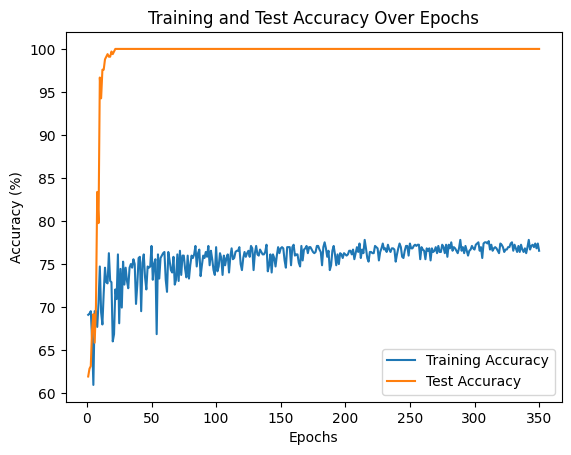

In [203]:
acc = perceptron.get_accuracy()
epochs_range = range(1, 1000 + 1)
plt.plot(epochs_range, acc[0], label='Training Accuracy')
plt.plot(epochs_range, acc[1], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Test Accuracy Over Epochs')
plt.legend()
plt.show()